# chi-squared

---
---

In [1]:
from scipy.stats import chi2_contingency
import pandas as pd
from sklearn.datasets import load_iris

---
---

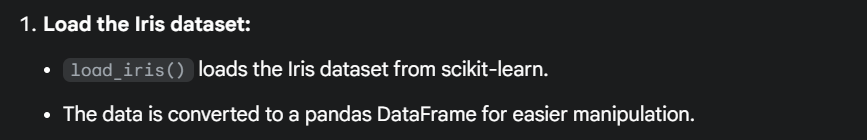

In [2]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

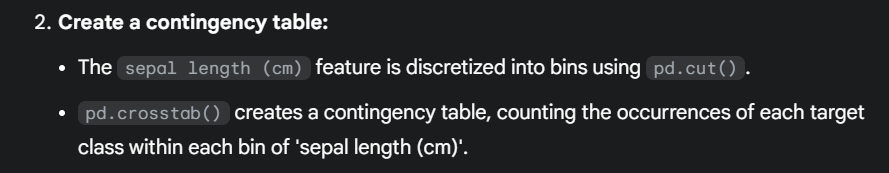

In [3]:
# Create a contingency table for 'sepal length (cm)' and 'target'
# Discretize 'sepal length (cm)' into bins (you can adjust bin numbers)
bins = [4, 5, 6, 7, 8]
data['sepal_length_bin'] = pd.cut(data['sepal length (cm)'], bins=bins)

contingency_table = pd.crosstab(data['sepal_length_bin'], data['target'])
contingency_table

target,0,1,2
sepal_length_bin,,,
"(4, 5]",28,3,1
"(5, 6]",22,27,8
"(6, 7]",0,20,29
"(7, 8]",0,0,12


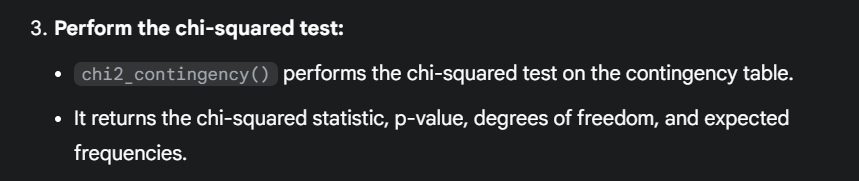

In [4]:
# Perform the chi-squared test
stat, p, dof, expected = chi2_contingency(contingency_table)

# basically passing the crosstab of categorical columns to chi2_contingency()

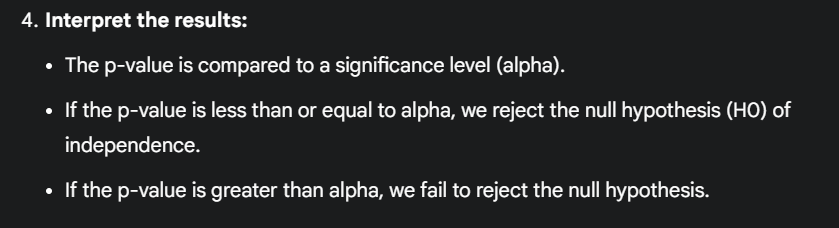

In [5]:
# Interpret the results
alpha = 0.05
print("p-value is " + str(p))

if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p-value is 4.3870167312639317e-20
Dependent (reject H0)


# another example

**suppose i make a survey between actor's sex { male ,female } and people opinion { watching movie yes , watching movie no } .**

**is a significant association between the actor and opinion ?**

In [6]:
data = {
    'y':[140,178],
    'n':[44,38]
}
data=pd.DataFrame(data,index=['male','female'])
data

,y,n
male,140,44
female,178,38


In [7]:
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(data)

# Results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
if p < 0.05:
    print("There is a significant association between the actor and opinion.")
else:
    print("No significant association between the variables.")

Chi-Square Statistic: 2.0631134212171593
P-value: 0.15090157528143688
Degrees of Freedom: 1
Expected Frequencies:
 [[146.28  37.72]
 [171.72  44.28]]
No significant association between the variables.
